In [2]:
%matplotlib inline
from forschungspraktikum.jiles_atherton.functions import get_gradient, jiles_atherton_H, get_cost
from scipy.optimize import minimize
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import mu_0

In [33]:
# Beispielparameter des Jiles-Atherton-Modells
alpha = 0.001
a = 110.5
k = 30.0
c = 0.4
Msat = 1.35e5

params = [alpha, a, Msat, k, c]

# Eingangsgrößen
r = 2.0e-2 # m, Radius
i_hat = 15.0 # A, Strom
f = 1000.0 # Hz, Frequenz
n = 20 # Anzahl Perioden
n_p = 512# Datenpunkte pro Periode

In [52]:
t = np.arange(n * n_p)/(n_p*f) # Zeitvektor
current = i_hat*np.sin(2*np.pi*f*t)*0.5*t/max(t) # Stromvorgabe
H = current/(2*np.pi*r) # Resultierende Feldvorgabe

In [53]:
M = np.array(jiles_atherton_H(H, t, params))

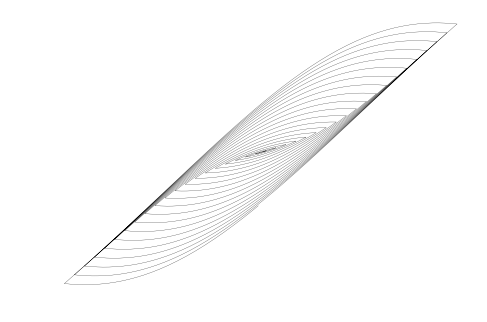

In [58]:
B = mu_0*(H[::2]+M)
fig = plt.figure(frameon=False)
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(H[::2], B, color='xkcd:black', linewidth=0.23)
ax.axis('off')
fig.savefig('hysteresis.pdf', transparent=True)
plt.show()